# Titanic kaggle challenge

This challenge is the *hello world* of the data science. The scope is to uncover who will survive the infamus crash with the iceberg considering some data provided by Kaggle in a *CSV*. This is an easy supervised classification problem. We are going to go trough all the various steps of a ML program (based on the O'reilly books):
1. Get the data;
1. Discove and visualize the data;
1. Prepare the data;
1. Select and train the model;
1. Fine-tune the model.

The data needed for this project can be found [here](https://www.kaggle.com/c/titanic/data). Let's start by importing some libraries and loading the data.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import numpy as np
import os 

# Load the data
train_data = pd.read_csv('./train.csv')
test_data = pd.read_csv('./test.csv')

# Seaborn settings
sn.set(style="whitegrid", palette="pastel", color_codes=True)

Let's now take a look at our data. Let's start by analizing the dimension of our training set.

In [2]:
print('Training set shaepe: ', train_data.shape)

Training set shaepe:  (891, 12)


We have 12 features and 891 samples. Quite the small dataset. Let's take a look at the structure of the table:

In [3]:
train_data.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

Each row represents one passenger. We can see that the second row, *survived*, will be the label of our passenger. It is represented as a binary value, where 1 stands for survived and 0 stands for dead. The other features are :
1. *PassengerId*, an ID given to every passenger;
1. *Pclass*, the class of the passenger on the cruise.;
1. *Name*, the name of the passenger;
1. *Sex*, the sex of the passenger;
1. *Age*, the age of the passenger;
1. *SibSp*, the number of siblings and spouses on the ship;
1. *Parch*, the number of parents and children on the ship;
1. *Ticket*, the ticket's number;
1. *Fare*, the ticket's fare;
1. *Cabin*, the cabin of the passenger;
1. *Embarked*, in which area the passegner embarked.

Let's now get a quick description of the data trough the pandas *info()* method.

In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Here, we can see that out of 891 entries some features are incomplete: *Age*, *cabin* and *embarked*. Some rows might therefore miss this feature. We'll solve this later on. We can take a lok at the summary of the numerical attribues by using the pandas *describe()* method:

In [5]:
train_data.describe()

PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200

*count* is the number of samples. *mean* is quite obviously the mean value fo the feature, while *std* is the standard deviation. The percentiles rows shows the value below which a given percentage of observations ina  group of obeservations fall. 

### data visualization
We should also try to visualize the data whenever is possible. Trough the pandas *hist()* method, we an get the histograms for every feature, which we can then plot with matplotlib.

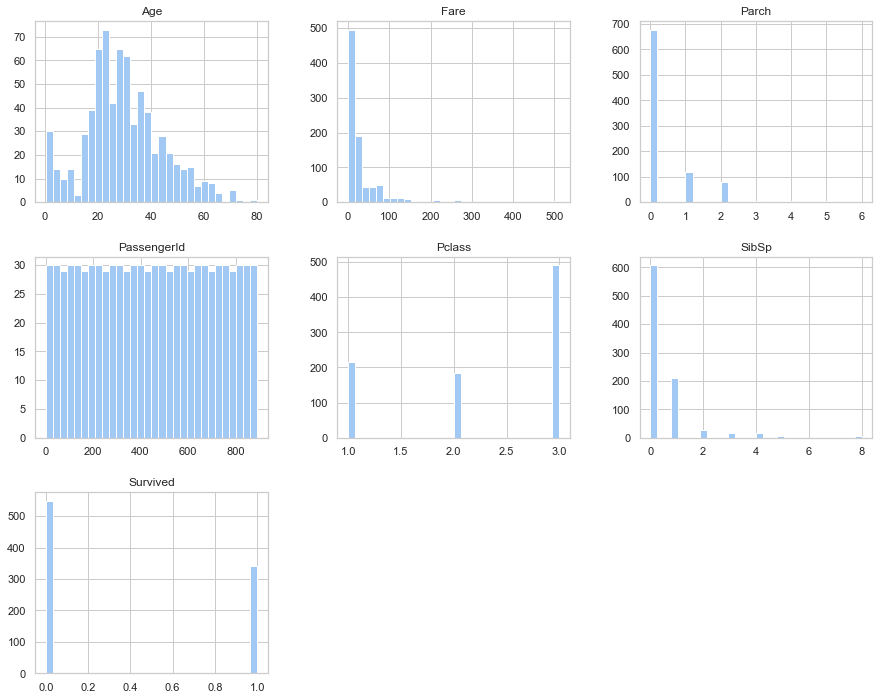

In [6]:
train_data.hist(bins=30, figsize=(15, 12))
plt.show()
plt.close()

From the data, we can see that the majority of the passenger was in the 3rd class. The survival rate is around 35%. The majority of the travellers were solo. We took an early look at our data's distributions. Let's go a bit deeper:

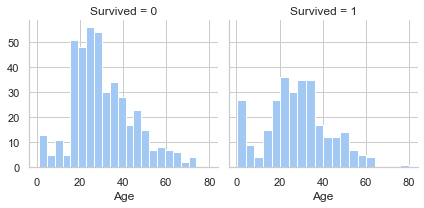

In [7]:
# plot age over survival
h = sn.FacetGrid(train_data, col='Survived')
h.map(plt.hist, 'Age', bins=20)

Here we can notice that more kids survived than not, while for old people the survival rate it's almost the same. We can notice the peak around the 30s in the deaths, which is interesting. Let's take a look at how the fare correlate to the survival.

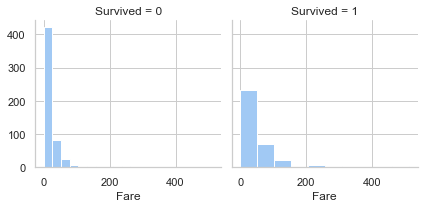

In [8]:
# plot fare over survival
h = sn.FacetGrid(train_data, col='Survived')
h.map(plt.hist, 'Fare', bins=10)

People which payed less were also the one in the lower classes, so it was expected that the casualities would be high. However, we can see that for high fares, the survival rate is higher. Let's explore this direction by plotting the survival rate over the passenger class.

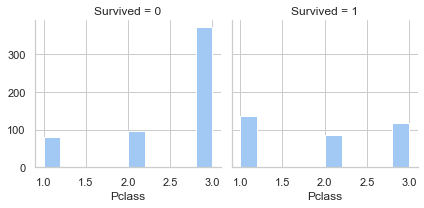

In [9]:
# plot passenger class over survival
h = sn.FacetGrid(train_data, col='Survived')
h.map(plt.hist, 'Pclass', bins=10)

Seems like my intuition was right. The higher the passenger class, the higher the survival rate. How about the sex of the person? 

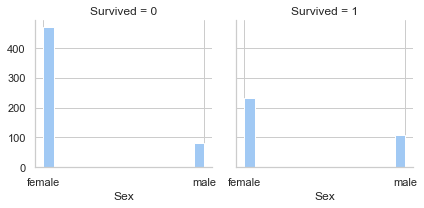

In [10]:
# plot sex over survival
h = sn.FacetGrid(train_data, col='Survived')
h.map(plt.hist, 'Sex', bins=15)

Seems like the data is quite unbalanced here. We can look for correlation between Age and Sex over the survival rate:

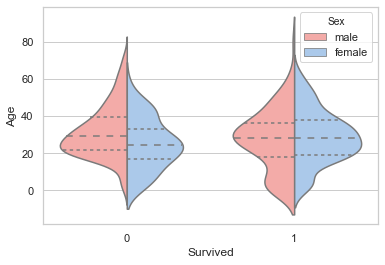

In [11]:
sn.violinplot(x="Survived", y="Age", hue="Sex",
               split=True, inner="quart",
               palette={"male": "r", "female": "b"},
               data=train_data)

This might end up affecting the prediction. 
I'm still unsure about the embark zone's impact over the survival. Let's explore more: 

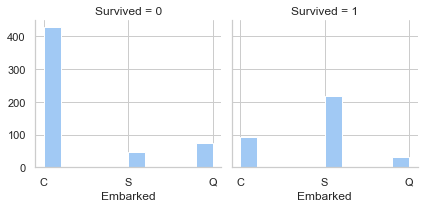

In [12]:
# plot embark zone over survival
h = sn.FacetGrid(train_data, col='Survived')
h.map(plt.hist, 'Embarked', bins=10)

Interesting, this might have some correlation after all.

To go further, we can try plotting the correlation matrix to se which features are mostly correlated:

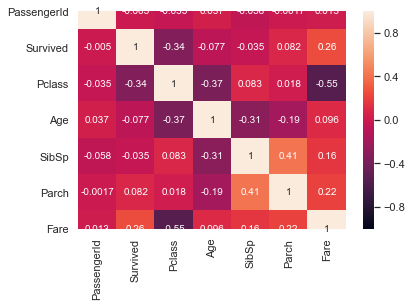

In [13]:
correlations = train_data.corr() # get the correlations from the dataset
sn.heatmap(correlations, vmin =-1, vmax=1, annot=True) # plot trough seaborn

By looking at the matrix, we can see that the number of parents and children might be an important factor for our prediction. The age seems also an important factor. 

### Data cleaning
Let's now move forward. We still have to solve the missing data from some features. Here, our ptions are to either get ride of the feature, delete the sample with the missing samples or manually set the values (zero, mean, median, etc). We previously noticed that *cabins* only had 204/891 values, thus dropping it should be a good way to start. *Age* has a strong correlation with the survive attribute, so filling the missing samples with the median could be a good way to approach the problem. *Embarked* is missing just two values, we can just drop the row. 

In [14]:
train_data = train_data.drop(['Cabin', 'PassengerId'], axis=1) # drop the features
ID_test = test_data['PassengerId'] #save the ID feature
test_data = test_data.drop(['Cabin', 'PassengerId'], axis=1) # drop the features

age_median = train_data['Age'].median() # calculate the age median
train_data['Age'].fillna(age_median, inplace=True) # Replace the NaN values with median
test_data['Age'].fillna(age_median, inplace=True) # Replace the NaN values with median

train_data = train_data.dropna(subset=['Embarked']) # remove the NaN embarked rows
test_data = test_data.dropna(subset=['Embarked']) # remove the NaN embarked rows

Let's examine our data once again:

In [15]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 10 columns):
Survived    889 non-null int64
Pclass      889 non-null int64
Name        889 non-null object
Sex         889 non-null object
Age         889 non-null float64
SibSp       889 non-null int64
Parch       889 non-null int64
Ticket      889 non-null object
Fare        889 non-null float64
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(4)
memory usage: 76.4+ KB


### Text attributes & feature engineering

Dealing with objects type attributes is quite tricky. Here we have:
1. *Name*: the name of the person. This attribute is clearly not useful as a whole, but obtaining the title might be useful;
1. *Sex*: This might be useful. Here, a possibility is to just encode the sex of a person as a binary value;
1. *Ticket*: The number of the ticket is probably not useful to our prediciton, so we can just remove it;
1. *cabin*: the cabin of the passenger. This could have some correlation, so we're keeping it for now;
1. *Embarked*: The area in which the passenger embarked. This isn't probably correlated, but we're keeping it just o be sure.

Let's start by removing the useless feature.

In [16]:
train_data = train_data.drop(['Name','Ticket'], axis=1) # drop the features
test_data = test_data.drop(['Name','Ticket'], axis=1) # drop the features

We can now replace the sex with a binary encoding.

In [17]:
# convert to binary ints
def NumSex(data):
    data.Sex = data.Sex.replace('female','0')
    data.Sex = data.Sex.replace('male','1')
    data.Sex = data.Sex.astype(int)
    
NumSex(train_data)
NumSex(test_data)

Let's also map the embark zone in an int.

In [18]:
# convert to binary ints
def NumEmb(data):
    data.Embarked = data.Embarked.replace('Q','1')
    data.Embarked = data.Embarked.replace('C','2')
    data.Embarked = data.Embarked.replace('S','3')
    data.Embarked = data.Embarked.astype(int)
    
NumEmb(train_data)
NumEmb(test_data)

We also needs to extract the labels from our training set. Those are the 'Survived' feature, which is the first column of our dataset.

In [19]:
Y_train = train_data.loc[:, 'Survived']
X_train = train_data.loc[:, 'Pclass':]

Let's check our data once again:

In [20]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 7 columns):
Pclass      889 non-null int64
Sex         889 non-null int32
Age         889 non-null float64
SibSp       889 non-null int64
Parch       889 non-null int64
Fare        889 non-null float64
Embarked    889 non-null int32
dtypes: float64(2), int32(2), int64(3)
memory usage: 48.6 KB


In [21]:
print(Y_train)

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 889, dtype: int64


### Training

Let's now try to predict the survival rate over unseen data. Initially, we need to learn our model. This is a supervised classification problem, so I will go over some of the most classic ML binary classification algorithms like Logistic regression, Decision Trees and SVM. I will try some algorithm and check what gives the best results. Since our dataset is quite small, we'll use Cross Validation to test our model.

In [22]:
# Import some additional libraries
from sklearn.model_selection import cross_val_score
from sklearn import linear_model

#### Perceptron
Let's start with the simplest way to do binary classification: the perceptron. We implement the function from Scikit learn.

In [23]:
perceptron = linear_model.Perceptron() 
scores = cross_val_score(perceptron, X_train, Y_train, cv=5)

print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.63 (+/- 0.26)


That's quite on the low side, but we're still using a very simple algorithm. 

#### Logistic Regression

Let's try with Logistic Regression  for predicting the correct labels now. 

In [25]:
#run Logistic Regression
logreg = linear_model.LogisticRegression('l2')

scores = cross_val_score(logreg, X_train, Y_train, cv=5)

print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.79 (+/- 0.04)


C:\Users\zanet\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\zanet\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\zanet\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\zanet\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\zanet\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

We've got an improvement, but still not nearly enough. We've tried with the standard regularization term (C: 1.0). Let's see if we can find something better by tweaking a bit the regularization parameter using a Grid Search.

In [26]:
from sklearn.model_selection import GridSearchCV

# parameters for Logistic Regression
params = {'C': [10, 5, 1, 0.5, 0.1, 0.05, 0.01, 0.001]}

#run Logistic Regression
logreg = linear_model.LogisticRegression('l2')

#find best model using 5-fold CV 
#and train it using all the training data
clf = GridSearchCV(estimator=logreg, param_grid=params, cv=5)

clf = clf.fit(X_train, Y_train)

print ('RESULTS FOR LINEAR KERNEL\n')

print("Best parameters set found:", clf.best_params_)

print("Score with best parameters:", clf.best_score_)

C:\Users\zanet\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\zanet\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\zanet\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\zanet\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\zanet\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

RESULTS FOR LINEAR KERNEL

Best parameters set found: {'C': 5}
Score with best parameters: 0.7919010123734533


C:\Users\zanet\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


We got a small improvement, but still nothing too crazy. 
### K-Nearest Neighbours Classifier.
Let's try now with K-Nearest Neighbours Classifier. We try some configuration of parameters of the numbers of neighbors, the size of the leaf, the power parameter (1 is manhattan_distance, 2 is euclidean distance)

In [27]:
from sklearn.neighbors import KNeighborsClassifier

# parameters for KNN
params = {'n_neighbors': [1,3,5,10], 'leaf_size': [10, 20, 30, 50, 100], 'p': [1,2]}

#run KNN
knn = KNeighborsClassifier()

#find best model using 5-fold CV 
#and train it using all the training data
clf = GridSearchCV(estimator=knn, param_grid=params, cv=5)

clf = clf.fit(X_train, Y_train)

print ('RESULTS FOR LINEAR KERNEL\n')

print("Best parameters set found:", clf.best_params_)

print("Score with best parameters:", clf.best_score_)

RESULTS FOR LINEAR KERNEL

Best parameters set found: {'leaf_size': 30, 'n_neighbors': 3, 'p': 1}
Score with best parameters: 0.7244094488188977


We managed to improve our performance once again. 
### Support Vector Machine
Let's try now with Support Vector Machine. Let's use linear kernel, Q-polynomial and rbf. To be sure of using the best parameters, we do a 5-fold cross validation gridsearch over the regulazation paramteter C and gamma.

In [ ]:
from sklearn.svm import SVC

# parameters for linear SVM
parameters = {'C': [0.1, 1, 10, 50, 100, 500]}

#run linear SVM
linear_SVM = SVC(kernel='linear')

#find best model using 5-fold CV 
#and train it using all the training data

clf = GridSearchCV(estimator=linear_SVM, param_grid=parameters, cv=5)

clf = clf.fit(X_train, Y_train)

print ('RESULTS FOR LINEAR KERNEL\n')

print("Best parameters set found:", clf.best_params_)

print("Score with best parameters:", clf.best_score_)

# parameters for poly with degree 2 kernel
parameters = {'C': [0.1, 1, 10, 50, 100, 500],'gamma':[0.001, 0.005, 0.01, 0.05, 0.1,1.]}

#run SVM with poly of degree 2 kernel
poly2_SVM = SVC(kernel='poly',degree=2)

clf = GridSearchCV(estimator=poly2_SVM, param_grid=parameters, cv=5)

clf = clf.fit(X_train, Y_train)

print ('\nRESULTS FOR POLY DEGREE=2 KERNEL\n')

print("Best parameters set found:", clf.best_params_)

print("Score with best parameters:", clf.best_score_)

# parameters for rbf SVM
parameters = {'C': [0.1, 1, 10, 50, 100, 500],'gamma':[0.001, 0.005, 0.01, 0.05, 0.1,1.]}

#run SVM with rbf kernel
rbf_SVM = SVC(kernel='rbf')

clf = GridSearchCV(estimator=rbf_SVM, param_grid=parameters, cv=5)

clf = clf.fit(X_train, Y_train)

print ('\nRESULTS FOR rbf KERNEL\n')

print("Best parameters set found:", clf.best_params_)

print("Score with best parameters:", clf.best_score_)

The score keeps improving. That's nice to see.
### Gradient Boosting classifier
I think we can actually take the score one step forward using the Gradient Boosting classifier.

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

# parameters for Gradient Boosting Classifier
params = {'loss': ['deviance', 'exponential'], 'learning_rate': [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1.], 'n_estimators': [50, 100, 200, 1000]}

#run linear SVM
gbc = GradientBoostingClassifier()

#find best model using 5-fold CV 
#and train it using all the training data

clf = GridSearchCV(estimator=gbc, param_grid=params, cv=5)

clf = clf.fit(X_train, Y_train)

print ('RESULTS FOR Gradient Boosting Classifier\n')

print("Best parameters set found:", clf.best_params_)

print("Score with best parameters:", clf.best_score_)

### Neural Network
I don't really want to go too hard with Neural Network for a simple problem like this one, but let's try to classify using the Multi-layer Perceptron. We have quite a bit of hyperparameters to validate, so let's try some configurations:

In [ ]:
from sklearn.neural_network import MLPClassifier

# Parameters for the neural network
parameters = {'hidden_layer_sizes': [(50,), (100,), (50, 20,), (100, 50,), (100, 50, 20,)],
          'alpha':[0.01, 0.001, 0.0001, 0.00001], 'learning_rate':['invscaling', 'adaptive'], 
          'learning_rate_init':[0.1, 0.01, 0.001, 0.001]}

#run MLP
mlp = MLPClassifier(activation='relu', solver='adam', max_iter=1000)

#find best model using 5-fold CV 
#and train it using all the training data

clf = GridSearchCV(estimator=mlp, param_grid=parameters, cv=5)

clf = clf.fit(X_train, Y_train)

print ('RESULTS FOR MLP Classifier\n')

print("Best parameters set found:", clf.best_params_)

print("Score with best parameters:", clf.best_score_)

We've found the best classifier in the **Gradient Boosting Classifier**. We can now apply our prediction to the test set and see how we perform! We did loaded the test dataset previously, as test_data. Let's check for missing data:

In [ ]:
test_data.info()

In [ ]:
fare_median = test_data['Fare'].median() # calculate the Fare median
test_data['Fare'].fillna(fare_median, inplace=True) # Replace the NaN values with median
test_data.info()

Seems everything is in place. We've already applied the transofrmation on the data to the test set, so we can just predict the labels with the best predictor.

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(learning_rate=0.5, loss='exponential', n_estimators=50)

# fit the training set
gbc.fit(X_train, Y_train)

# predict on the test set
pred = gbc.predict(test_data)

Let's finally rearrange our prediction into a single table and put it into a .csv:

In [ ]:
test_pred = pd.DataFrame(pred, columns= ['Survived'])

test = pd.concat([ID_test, test_pred], axis=1, join='inner')

test.to_csv('predictions.csv' , index=False)